<a href="https://colab.research.google.com/github/pomellonn/Risk_analytics/blob/main/lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 2: Линейная регрессия
### (10 баллов)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./income_dataset.csv',sep=';')
df.head()

,id,in_total_amt,income,job_salary,gender,age,car_own_flg,avg_limit,max_limit,credit_num,acc_num,out_total_amt
0,0,8110.825000,30000.0,32000,1,22.0,0,12847.00000,23862.0,7,9.0,38657.606406
1,1,25600.000000,50000.0,32000,0,26.0,0,26381.50000,24611.0,3,7.0,51272.839585
2,2,216091.400000,30000.0,38000,0,25.0,0,9176.48857,33998.0,14,3.0,147950.296174
3,3,106000.661389,50000.0,40000,0,36.0,0,32152.50000,23451.0,4,6.0,99925.392161
4,4,102672.375000,50000.0,17000,0,23.0,0,38493.50000,585000.0,9,7.0,78125.045718


In [3]:
df.isna().sum()

,0
id,0
in_total_amt,0
income,0
job_salary,0
gender,0
age,0
car_own_flg,0
avg_limit,0
max_limit,0
credit_num,0


In [4]:
X = df.drop(['id','income'], axis=1)
y = df['income']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

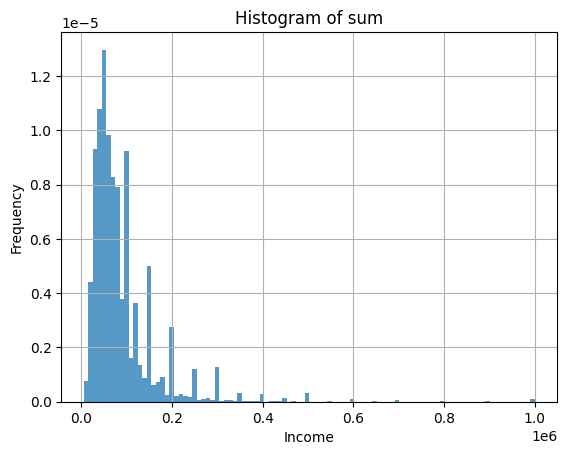

In [6]:
n, bins, patches = plt.hist(y_train, 100, density=True, alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of sum')
plt.grid(True)
plt.show()

In [7]:
X_train = X_train[y_train <= np.percentile(y_train, 95)]
y_train = y_train[y_train <= np.percentile(y_train, 95)]

In [8]:
y_train = np.log(y_train.clip(lower=1))
y_test =  np.log(y_test.clip(lower=1))

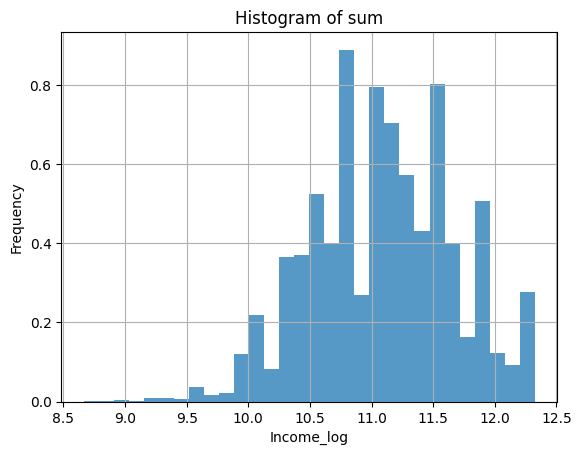

In [9]:
n, bins, patches = plt.hist(y_train, 30, density=True, alpha=0.75)
plt.xlabel('Income_log')
plt.ylabel('Frequency')
plt.title('Histogram of sum')
plt.grid(True)
plt.show()

---

<a id='task1'></a>
##### Задание 1 (3 балла)

1. Реализовать функцию feature_line(var, target, nbins)

    В качестве аргументов функция должна принимать:
     - var: вектор значений признака
     - target: вектор значений целевой переменной
     - nbins: количество бакетов

    и возвращать:
     - график линейности признака
     - количество удаленных наблюдений
     - значение метрики R2
     - гистограмму распределения признака


2. Проверить линейность признаков с помощью функции feature_line()

In [10]:
def feature_line(var, target, nbins=20):
    df = pd.DataFrame({
        'var': var,
        'target': target
    })

    init_len = len(df)
    df = df.dropna()
    removed = init_len - len(df)

    df['bin'] = pd.cut(df['var'], bins=nbins)

    group = df.groupby('bin', observed=False)

    stats = pd.DataFrame({
        'var_mean': group['var'].mean(),
        'target_mean': group['target'].mean(),
        'q25': group['target'].quantile(0.25),
        'q75': group['target'].quantile(0.75)
    }).dropna()

    stats['bin_num'] = np.arange(len(stats))

    X = stats['var_mean'].values.reshape(-1, 1)
    y = stats['target_mean'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    R2 = r2_score(y, y_pred)
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    ax1=axes[0]

    ax1.plot(stats['var_mean'], stats['target_mean'],
             linestyle='--', marker='o', color='r', label='target')

    for x, q1, q2 in zip(stats['var_mean'], stats['q25'], stats['q75']):
        ax1.vlines(x, q1, q2, color='r')
        ax1.plot(x, q1, '_', color='r', markersize=5)
        ax1.plot(x, q2, '_', color='r', markersize=5)

    ax1.plot(stats['var_mean'], y_pred, label=f'Linear regression')

    ax1.set_xlabel('feature')
    ax1.set_ylabel('Target')
    ax1.set_title('Feature line')
    ax1.legend()
    ax2 = axes[1]
    ax2.hist(df['var'], bins=100)
    ax2.set_title('distribution of feature')
    plt.show()

    return removed, R2


Построим для каждого признака feature_line

in_total_amt


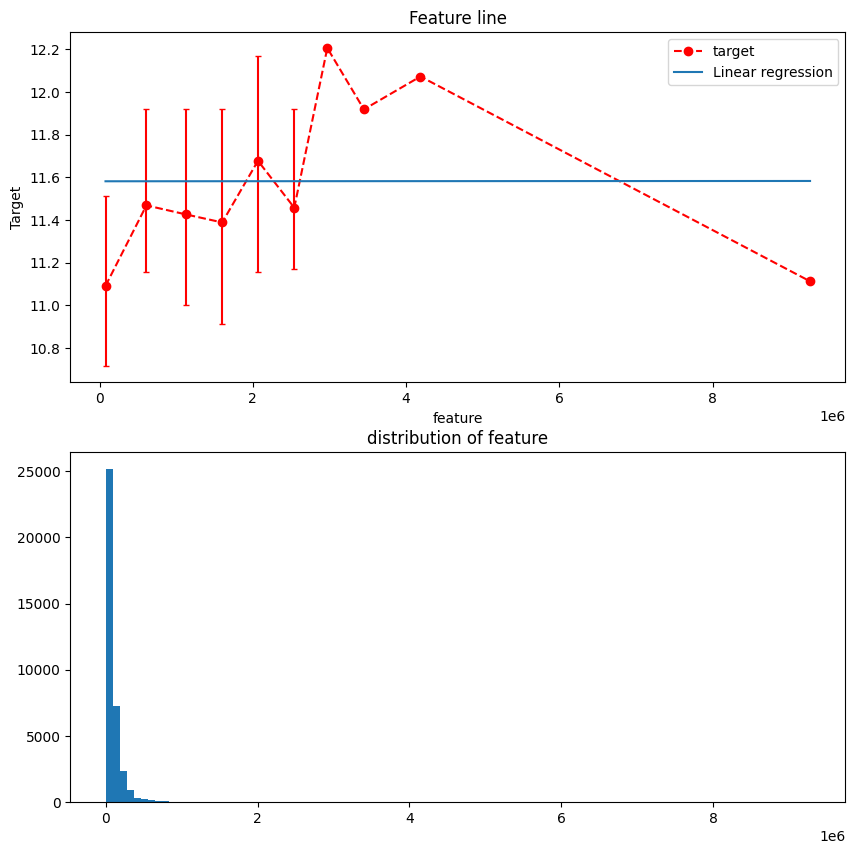

Removed rows: 0, R2 = 0.0000
____________________________________________________________________________________________________
job_salary


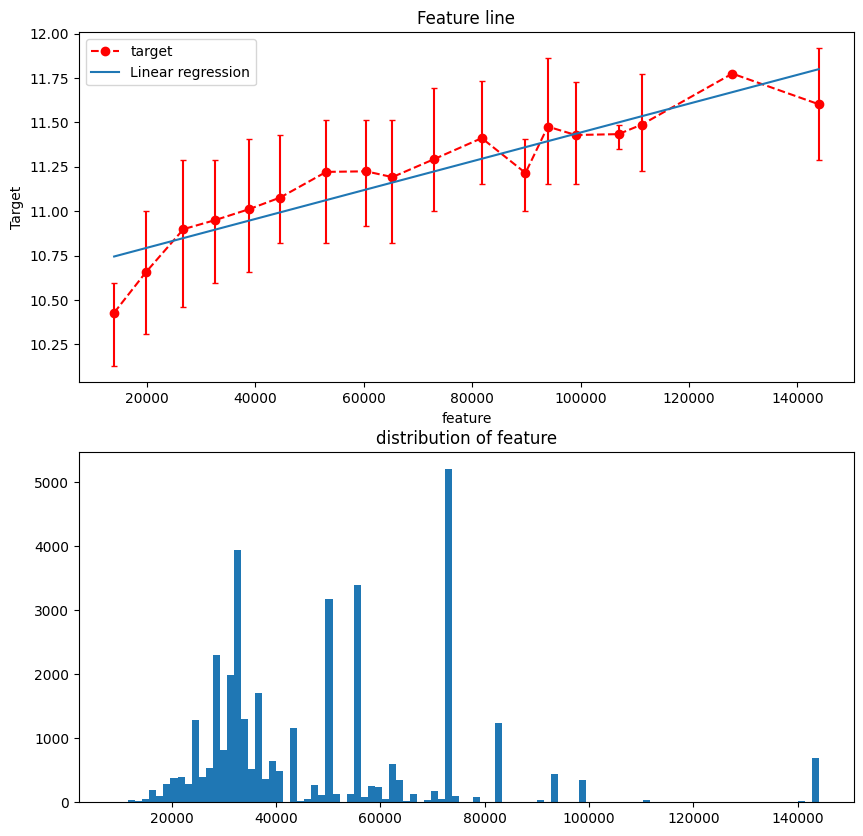

Removed rows: 0, R2 = 0.8559
____________________________________________________________________________________________________
gender


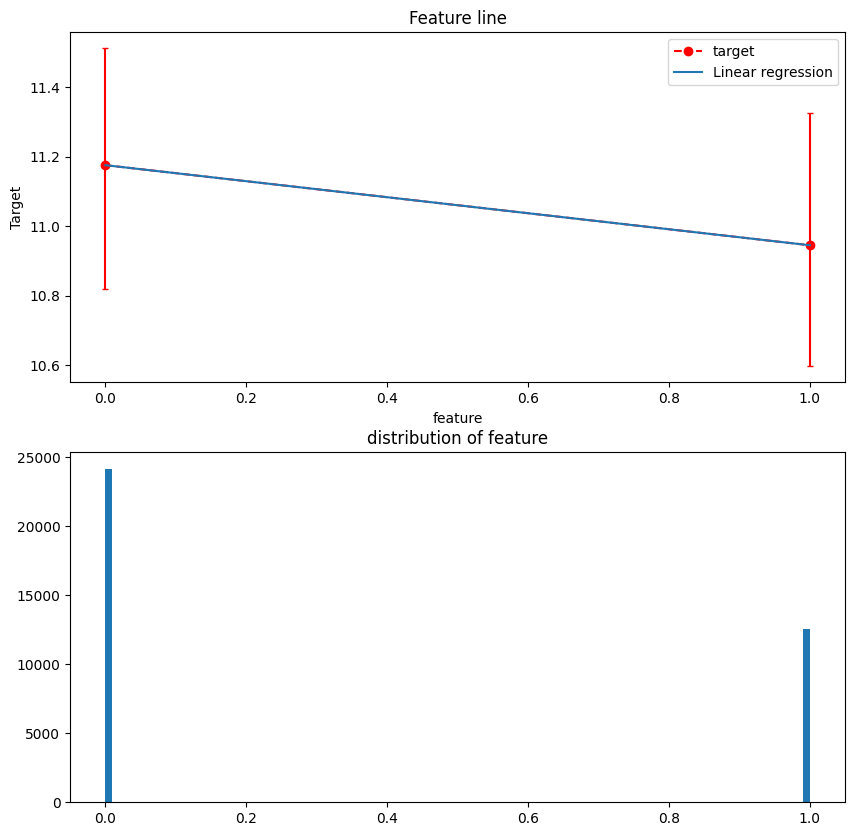

Removed rows: 0, R2 = 1.0000
____________________________________________________________________________________________________
age


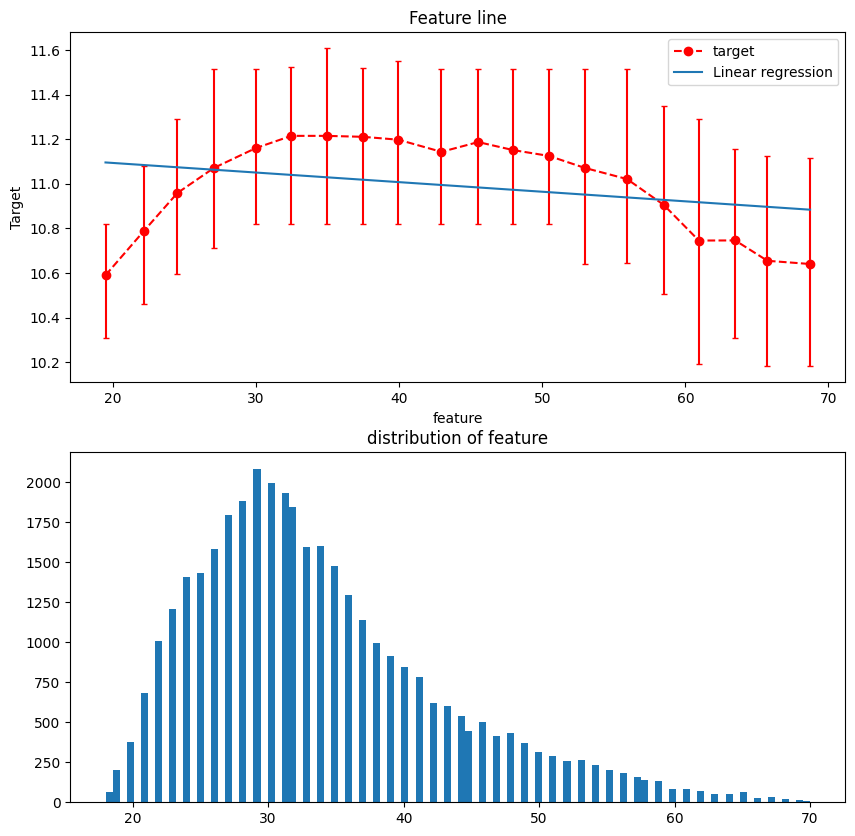

Removed rows: 0, R2 = 0.0912
____________________________________________________________________________________________________
car_own_flg


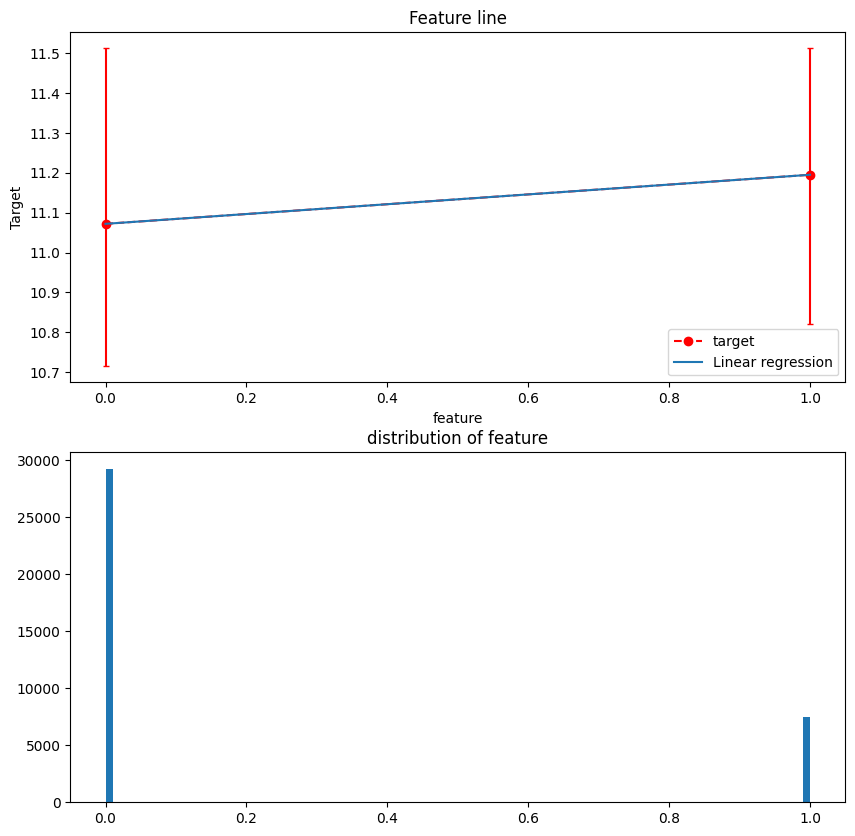

Removed rows: 0, R2 = 1.0000
____________________________________________________________________________________________________
avg_limit


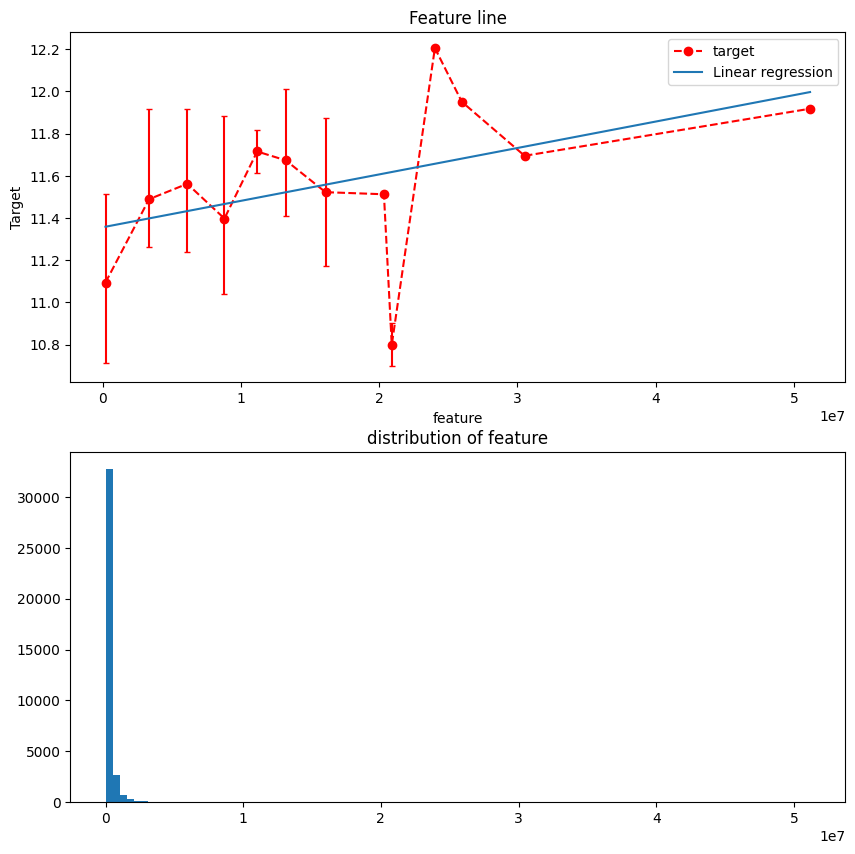

Removed rows: 0, R2 = 0.2185
____________________________________________________________________________________________________
max_limit


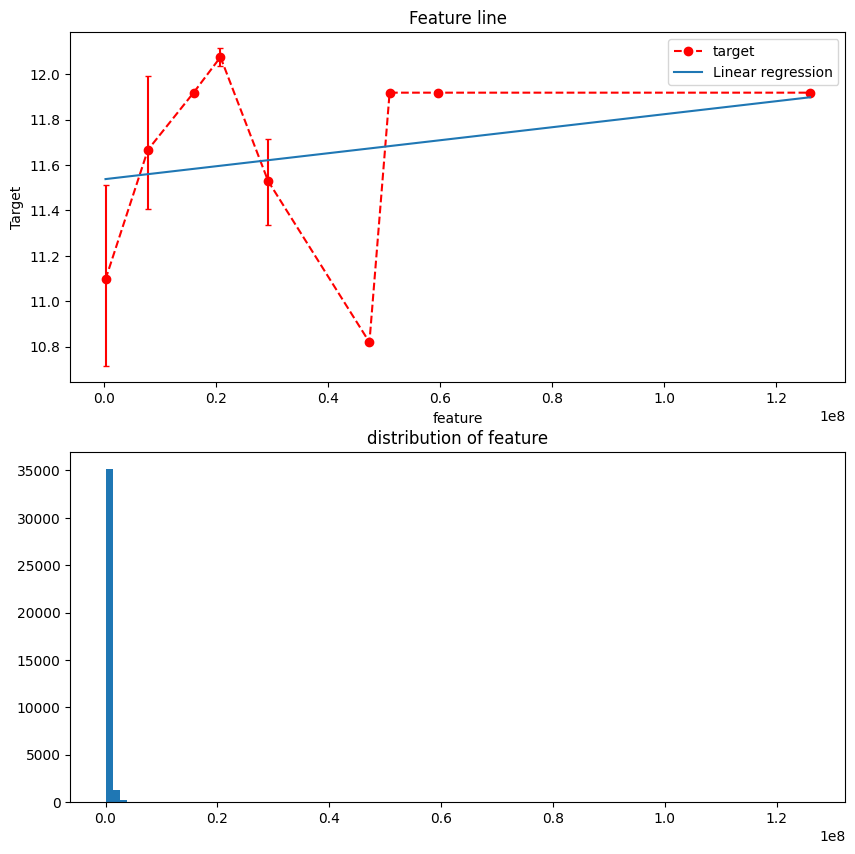

Removed rows: 0, R2 = 0.0645
____________________________________________________________________________________________________
credit_num


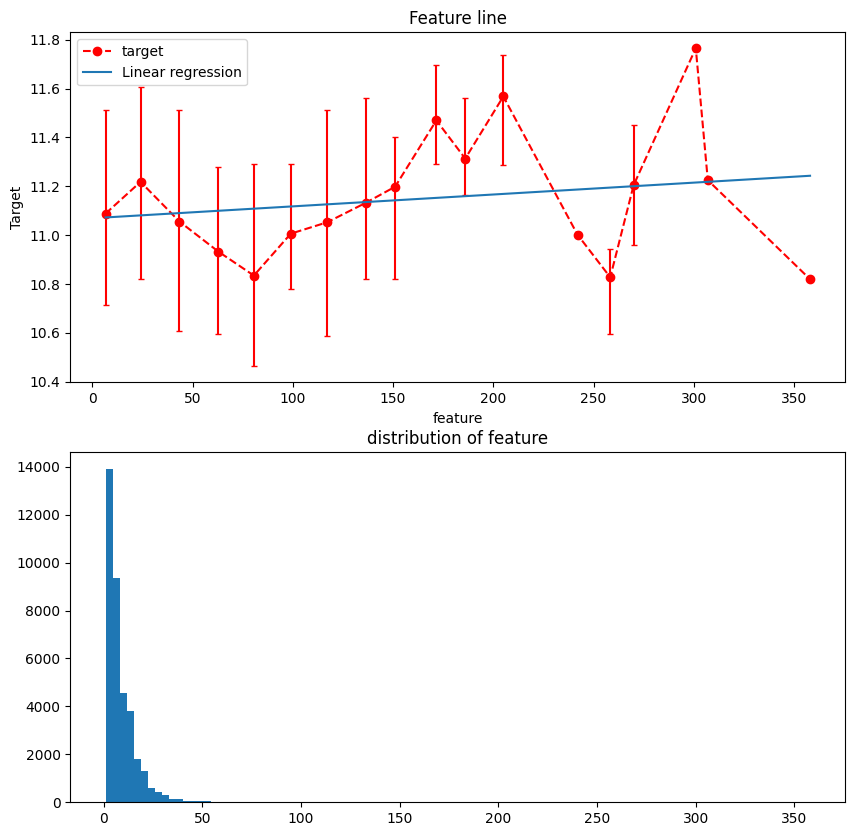

Removed rows: 0, R2 = 0.0396
____________________________________________________________________________________________________
acc_num


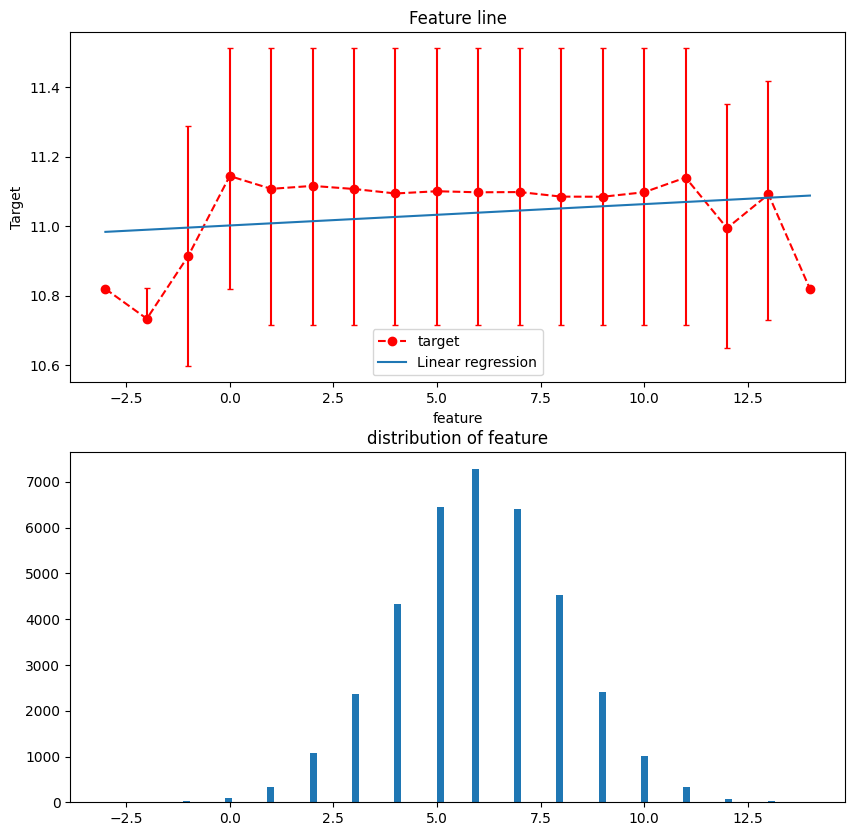

Removed rows: 0, R2 = 0.0684
____________________________________________________________________________________________________
out_total_amt


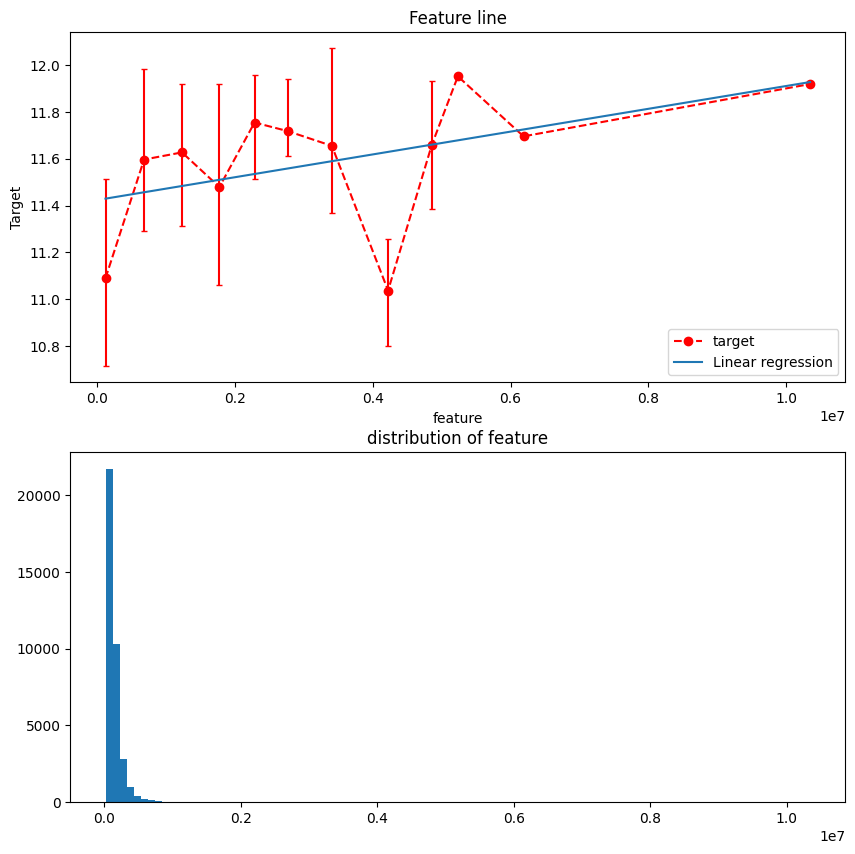

Removed rows: 0, R2 = 0.2418
____________________________________________________________________________________________________


In [11]:
for column in X.columns:
  print(column)

  rem, r2 = feature_line(X_train[column], y_train, 20)
  print(f"Removed rows: {rem}, R2 = {r2:.4f}")

  print('_'*100)


gender и
car_own_flg преобразовывать для задания 2 нет смысла, в силу того что они бинарны


<a id='task2'></a>
##### Задание 2 (1 балл)

Подобрать преобразование и линеаризовать признаки (для визуализации использовать feature_line()). Необходимо обосновать выбор преобразования.

Подсказка: линеаризовать признак age можно разбиением на линейные фрагменты

Признак ***`in_total_amt`***

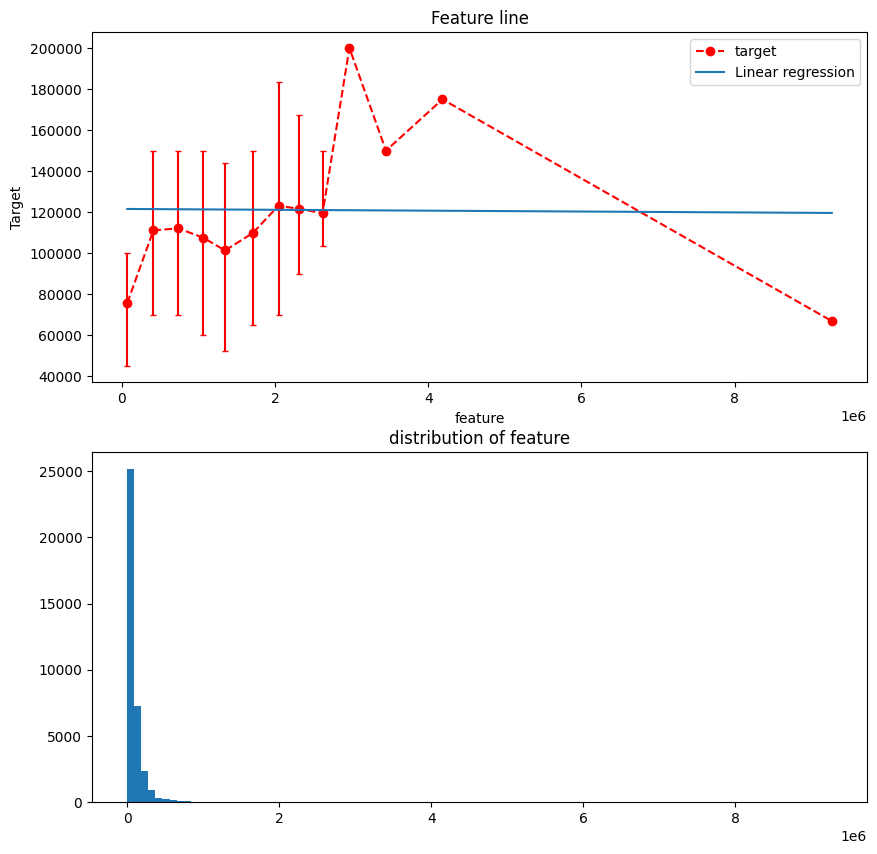

(18480, 0.00018895923957995553)

In [12]:
column = 'in_total_amt'
feature_line(X_train[column], y, 30)

Здесь возьмем логарифм данного признака

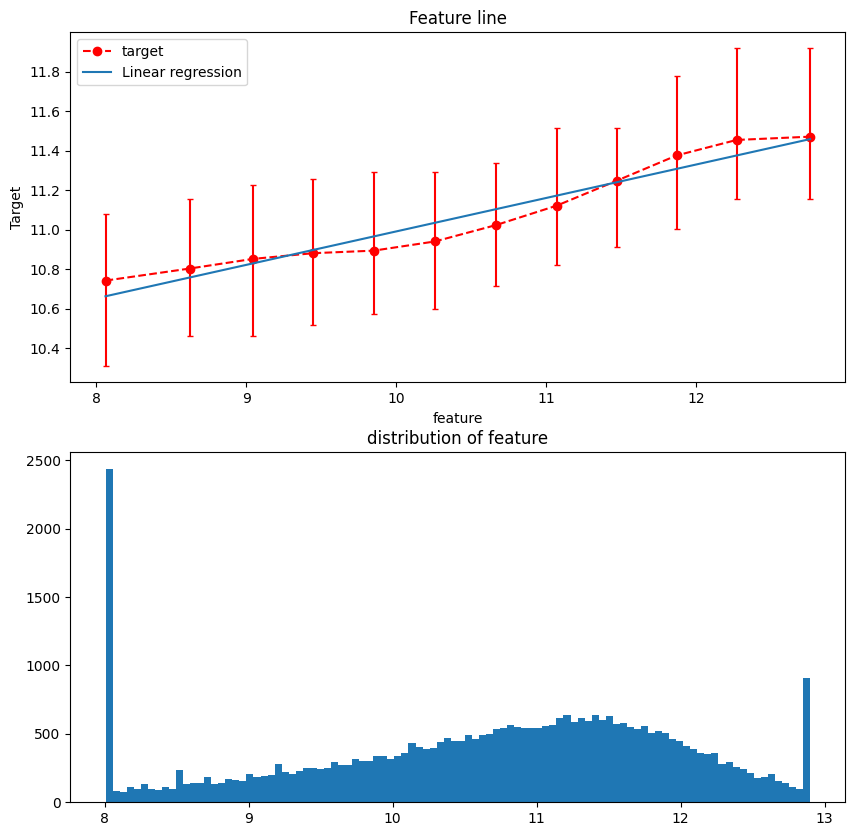

R2=0.942093277133444


In [13]:
X_train['in_total_amt_log'] = np.log(X_train['in_total_amt'].clip(lower=3000, upper=400000))
X_test['in_total_amt_log'] = np.log(X_test['in_total_amt'].clip(lower=3000, upper=400000))
rem, r2 = feature_line(X_train['in_total_amt_log'], y_train, 12)
print(f"R2={r2}")

Признак ***`age`***

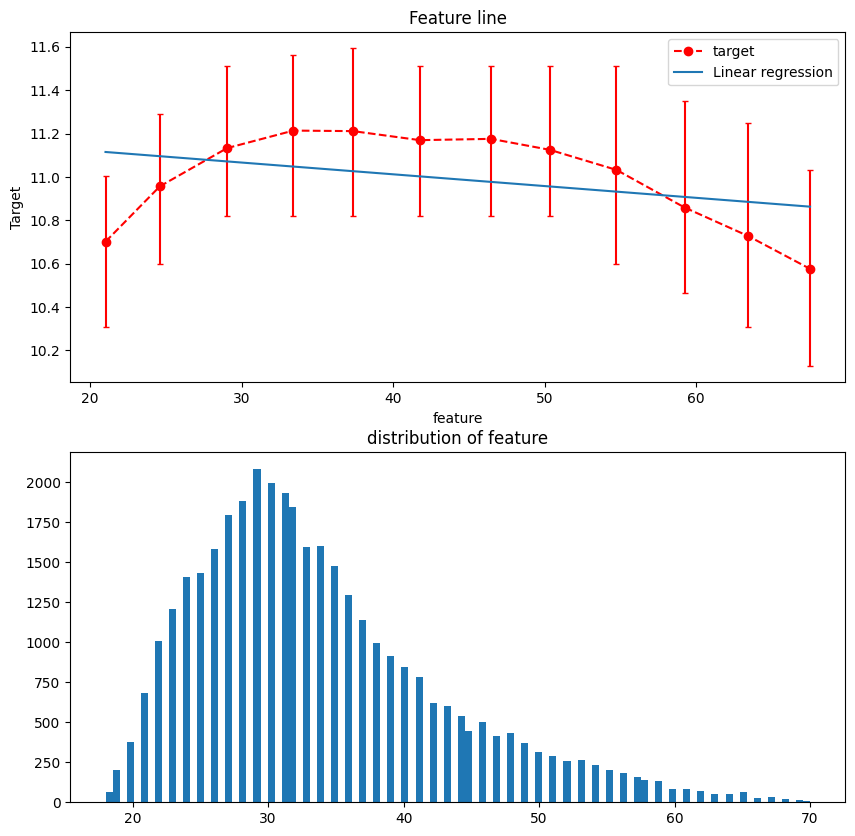

R2=0.14020443192121979


In [14]:
rem, r2 = feature_line(X_train['age'], y_train, 12)
print(f"R2={r2}")

Попробуем разбить возраст на линейные фрагменты

In [15]:
column = 'age'
interval = 10
X_train['age_linear'] = (X_train['age'] // interval) * interval + interval/2
X_test['age_linear'] = (X_test['age'] // interval) * interval + interval/2

In [16]:
X_train['age_linear'][:5]

,age_linear
0,25.0
1,25.0
2,25.0
3,35.0
4,25.0


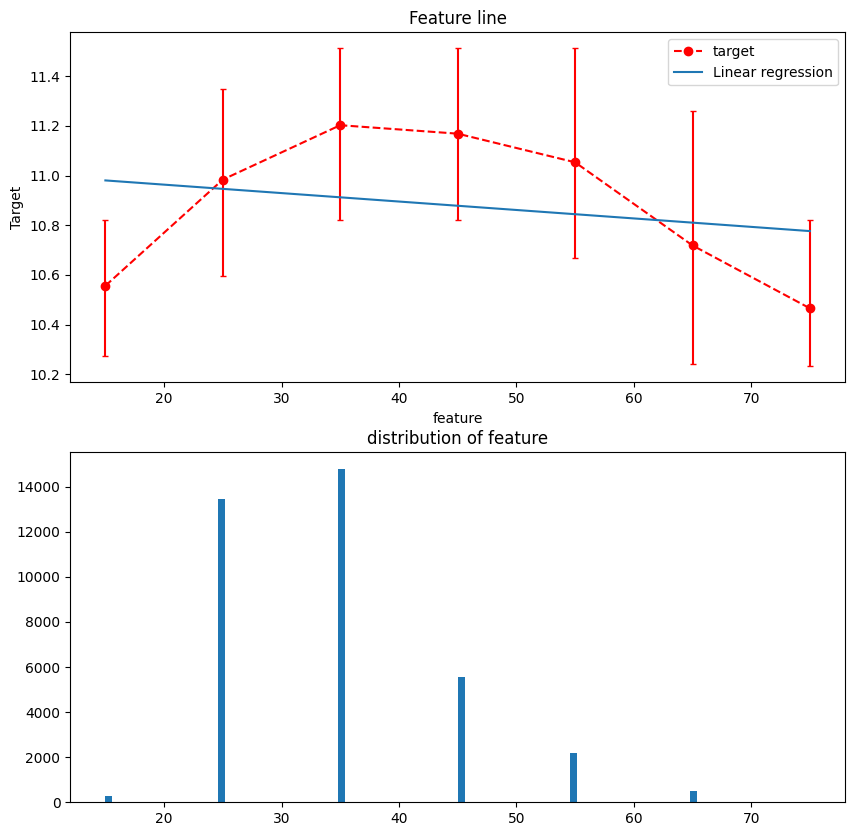

R2=0.06096093825116533


In [17]:
rem, r2 = feature_line(X_train['age_linear'], y_train, 12)
print(f"R2={r2}")

Признак ***`job_salary`***

In [18]:
def get_stats(a):
  print(f"  Среднее: {a.mean():,.0f}")
  print(f"  Медиана: {a.median():,.0f}")
  print(f"  Std: {a.std():,.0f}")
  print(f"  Min: {a.min():,.0f}")
  print(f"  Max: {a.max():,.0f}")

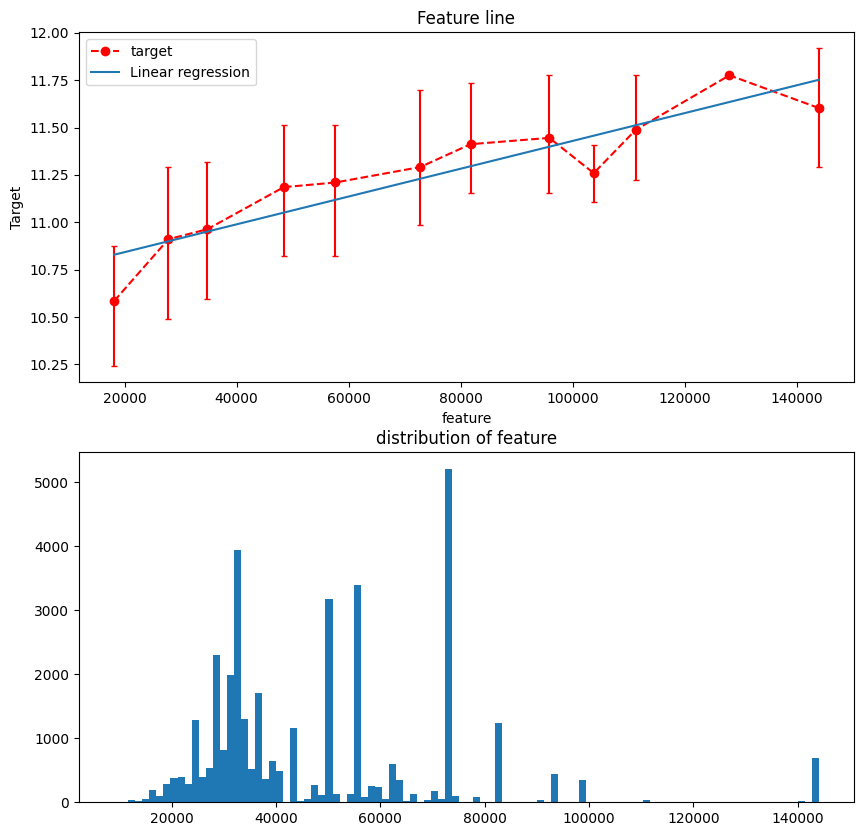

R2=0.8395660454206489


In [19]:
column = 'job_salary'
rem, r2 = feature_line(X_train[column], y_train, 12)
print(f"R2={r2}")

In [20]:
get_stats(X_train[column])

  Среднее: 49,008
  Медиана: 43,000
  Std: 23,369
  Min: 9,000
  Max: 144,000


Признак ***`avg_limit`***

  Среднее: 241,126
  Медиана: 112,443
  Std: 618,905
  Min: 0
  Max: 51,172,297
----------------------------------------


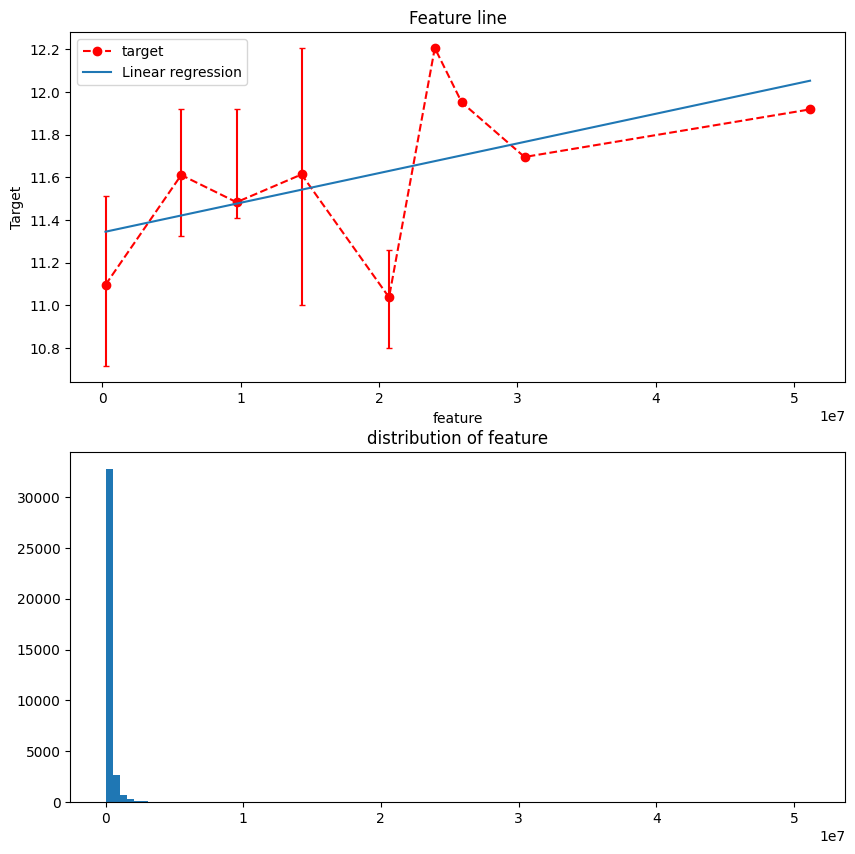

(0, 0.30534526887339764)

In [21]:
column = 'avg_limit'
get_stats(X_train[column])
print("-"*40)
feature_line(X_train[column], y_train, 12)


In [22]:
np.sum(X_train['avg_limit']==0)

np.int64(2547)

много значений = 0, можно добавить новую фичу - индикатор нуля

In [23]:
X_train['avg_limit_zero'] = (X_train['avg_limit'] == 0)
X_test['avg_limit_zero'] = (X_test['avg_limit'] == 0)

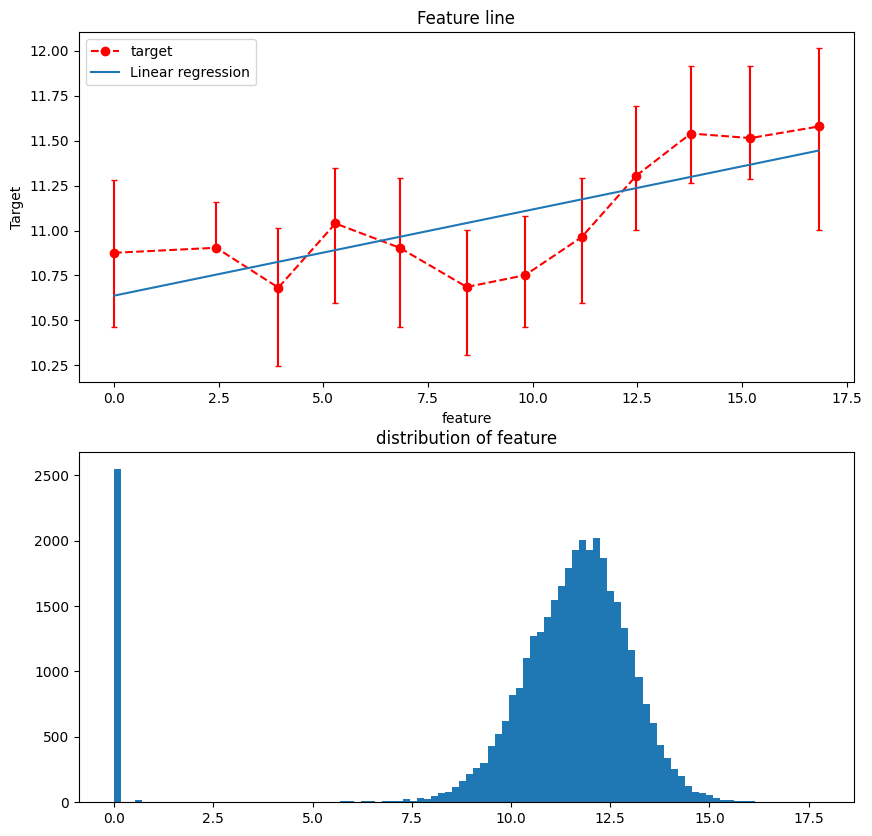

In [24]:
X_train['avg_limit_log'] = np.log(X_train['avg_limit'] + 1)
X_test['avg_limit_log'] = np.log(X_test['avg_limit'] + 1)
rem, r2 = feature_line(X_train['avg_limit_log'], y_train, 12)

In [25]:
r2

0.573998909599077

Срежем хвосты

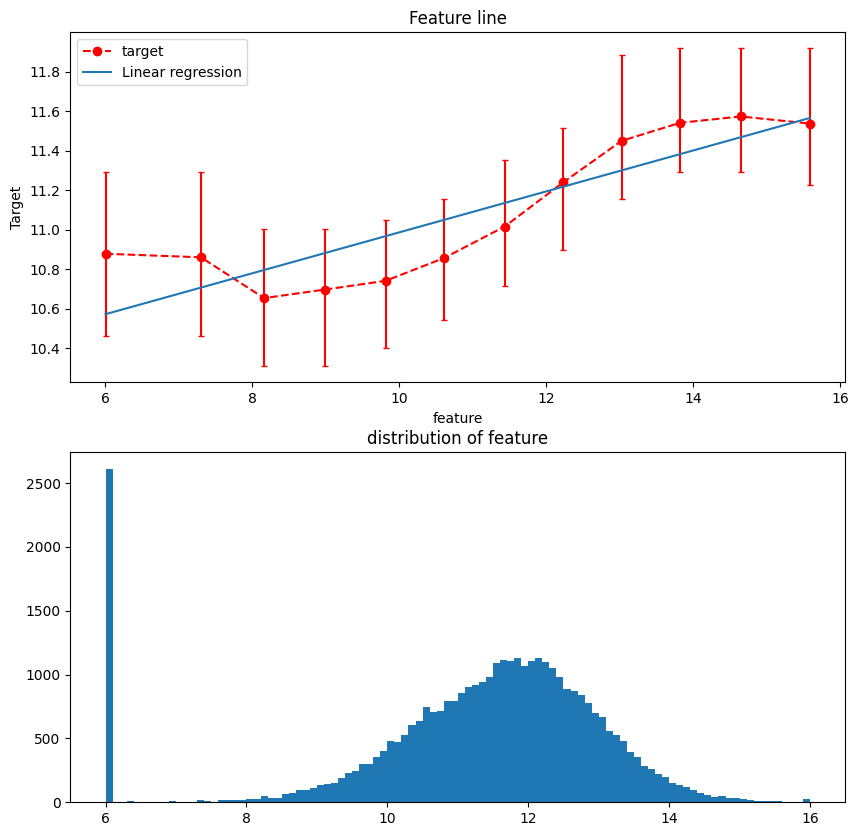

In [26]:
X_train['avg_limit_log'] = X_train['avg_limit_log'].clip(lower=6, upper =16)
X_test['avg_limit_log'] = X_test['avg_limit_log'].clip(lower=6, upper =16)
rem, r2 = feature_line(X_train['avg_limit_log'], y_train, 12)

In [27]:
r2

0.7636922268799957

Признак ***`max_limit`***

  Среднее: 338,084
  Медиана: 150,000
  Std: 1,007,934
  Min: 0
  Max: 126,000,000
----------------------------------------


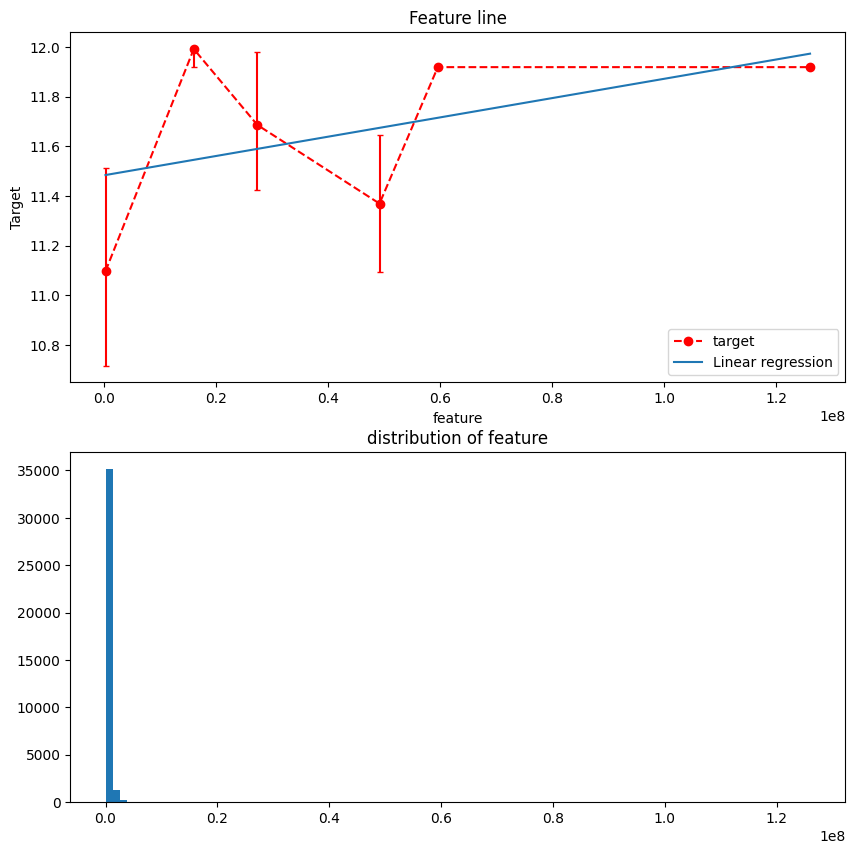

In [28]:
column = 'max_limit'
get_stats(X_train[column])
print("-"*40)
rem, r2 = feature_line(X_train[column], y_train, 12)


In [29]:
r2

0.23229005438138706

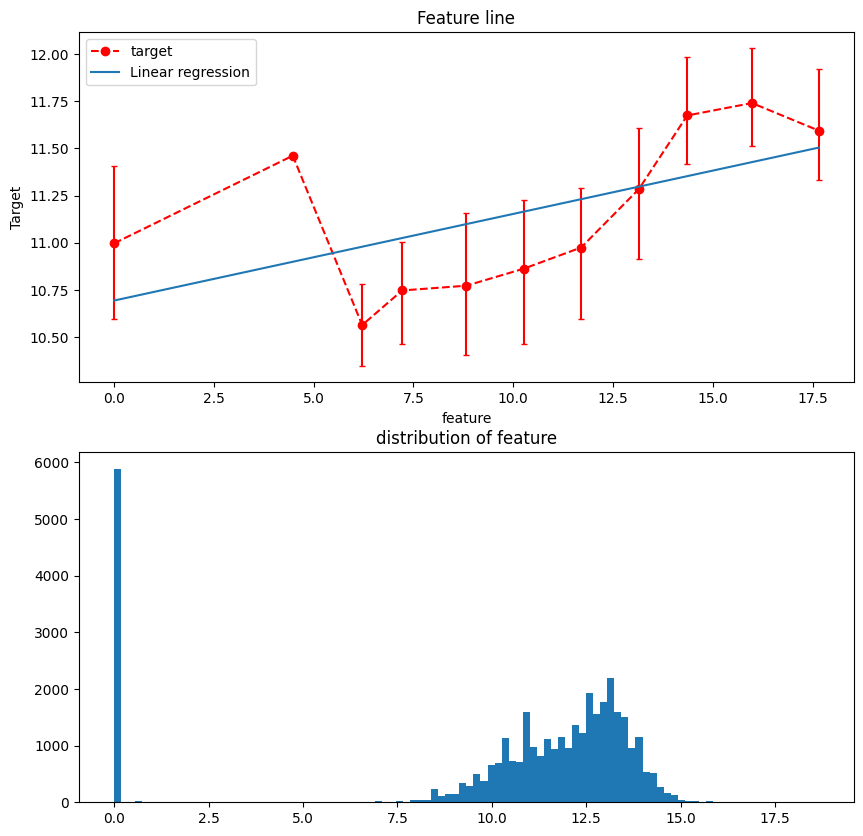

In [30]:
X_train['max_limit_log'] = np.log(X_train['max_limit'] + 1)
X_test['max_limit_log'] = np.log(X_test['max_limit'] + 1)
rem, r2 = feature_line(X_train['max_limit_log'], y_train, 12)

In [31]:
r2

0.34302958232387826

проделаем тоже самое что и для avg_limit

In [32]:
X_train['max_limit_zero'] = (X_train['max_limit'] == 0)
X_test['max_limit_zero'] = (X_test['max_limit'] == 0)

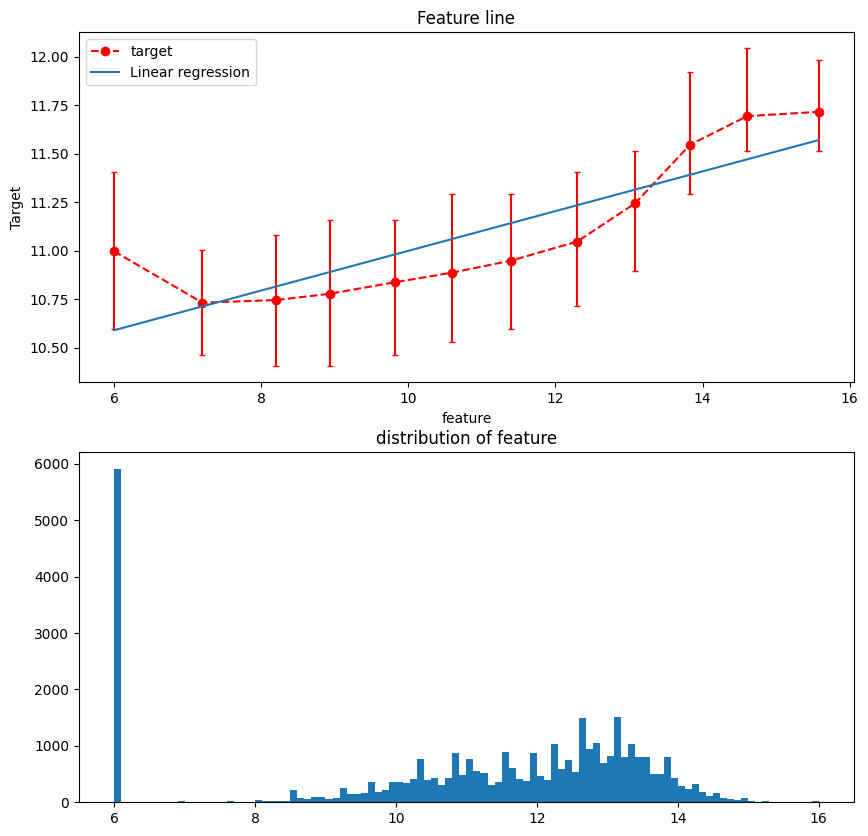

In [33]:
X_train['max_limit_log'] = X_train['max_limit_log'].clip(lower=6, upper =16)
X_test['max_limit_log'] = X_test['max_limit_log'].clip(lower=6, upper =16)
rem, r2 = feature_line(X_train['max_limit_log'], y_train, 12)

In [34]:
r2

0.7231298597485246

Признак ***`acc_num`***

  Среднее: 6
  Медиана: 6
  Std: 2
  Min: -3
  Max: 14


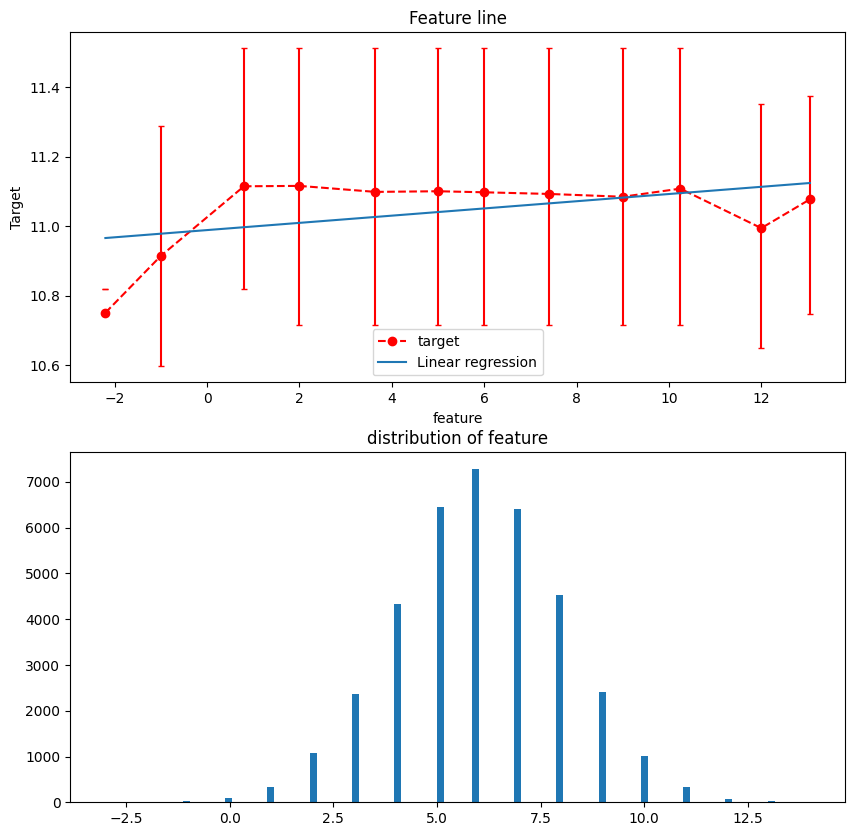

In [35]:
column = 'acc_num'
get_stats(X_train[column])
rem, r2 = feature_line(X_train[column], y_train, 12)


In [36]:
r2

0.22373959281604738

In [37]:
np.sum(X_train['acc_num']<0)

np.int64(31)

кол-во счетов - отрицательное значение ?!
если сделать нулями

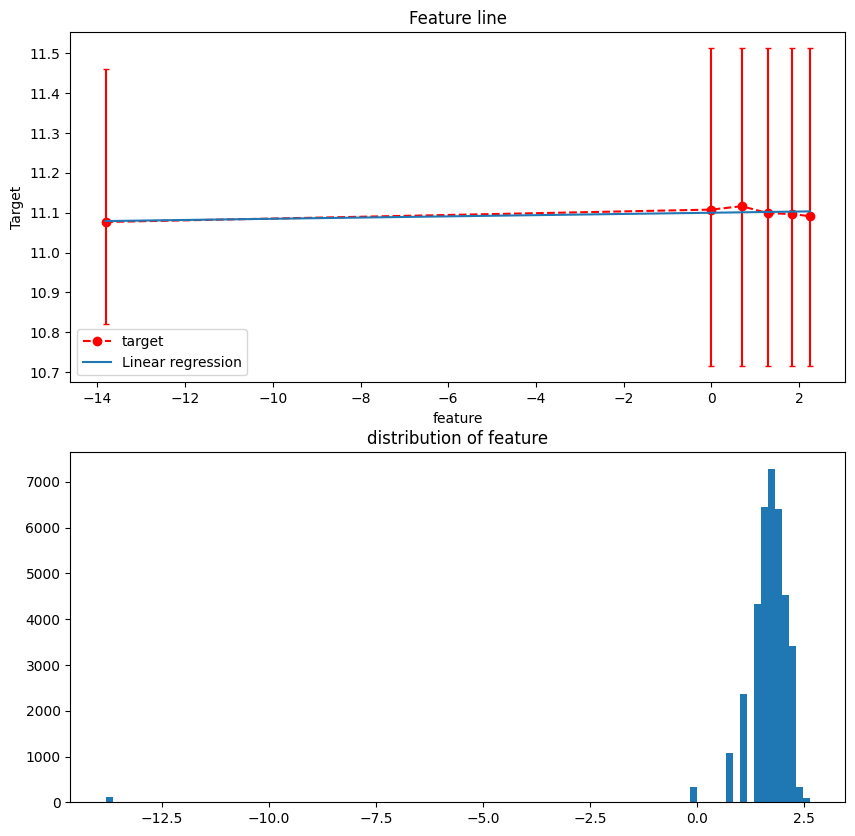

In [38]:
X_train['acc_num_log'] = np.log(X_train['acc_num'].clip(lower=1e-6) )
X_test['acc_num_log'] = np.log(X_test['acc_num'].clip(lower=1e-6) )
rem, r2 = feature_line(X_train['acc_num_log'], y_train, 30)

In [39]:
r2

0.4702001460968226

Признак ***`out_total_amt`***

  Среднее: 138,718
  Медиана: 105,161
  Std: 152,701
  Min: 18,953
  Max: 10,343,040
----------------------------------------


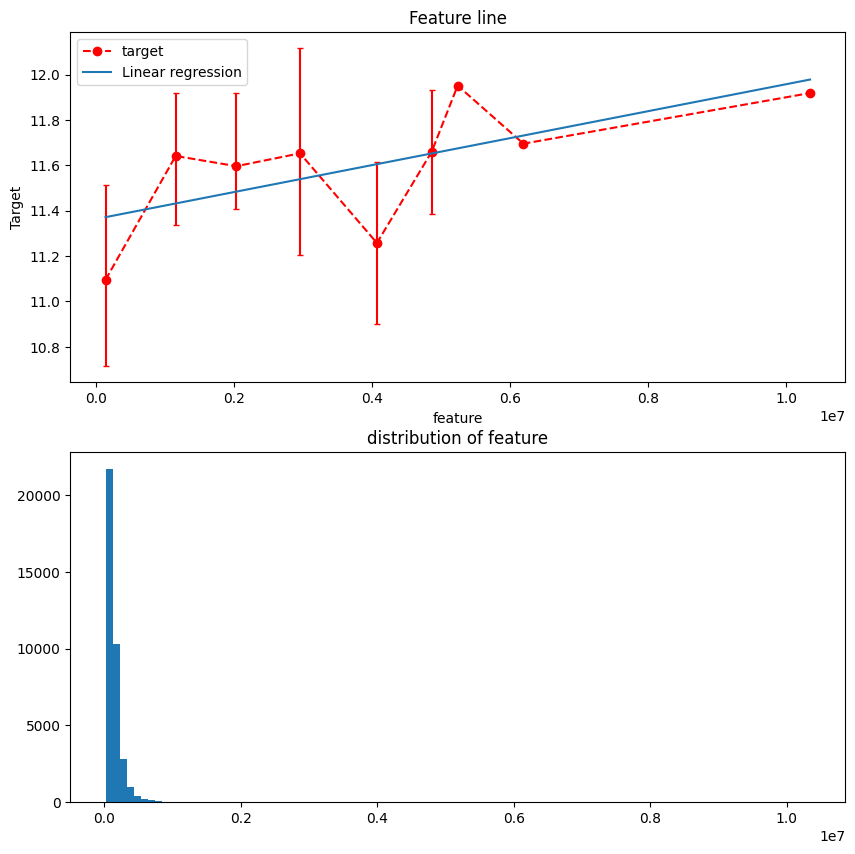

In [40]:
column = 'out_total_amt'
get_stats(X_train[column])
print("-"*40)
rem, r2 = feature_line(X_train[column], y_train, 12)

In [41]:
r2

0.4329847595930476

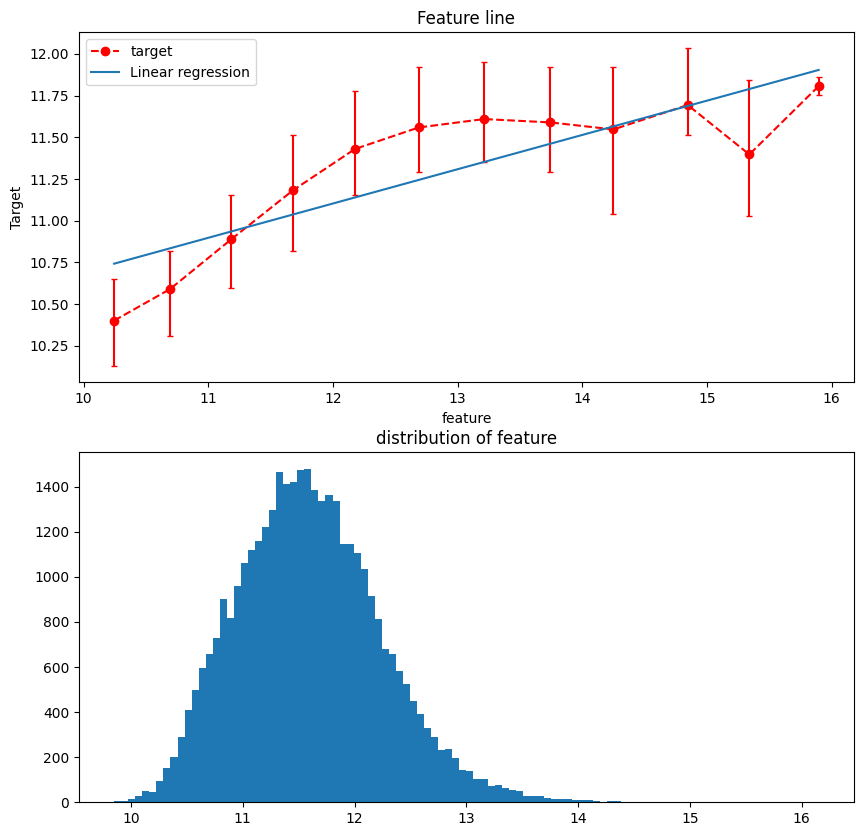

In [42]:
X_train['out_total_amt_log'] = np.log(X_train['out_total_amt'])
X_test['out_total_amt_log'] = np.log(X_test['out_total_amt'])
rem, r2 = feature_line(X_train['out_total_amt_log'], y_train, 12)

срежем хвост справа

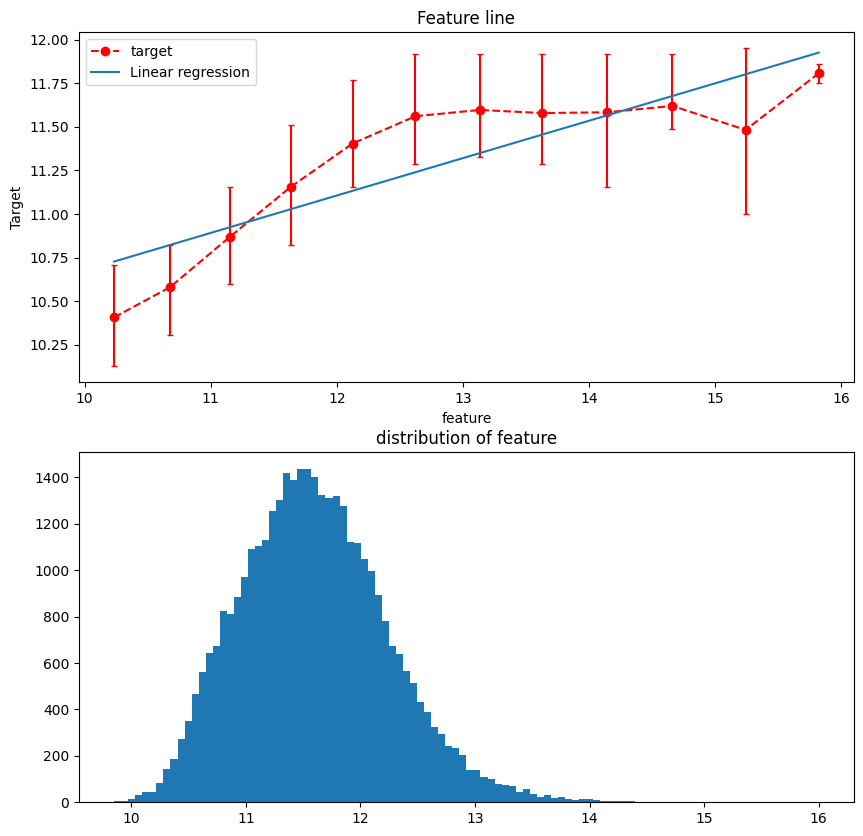

In [43]:
X_train['out_total_amt_log'] = X_train['out_total_amt_log'].clip(upper=16)
X_test['out_total_amt_log'] = X_test['out_total_amt_log'].clip(upper=16)
rem, r2 = feature_line(X_train['out_total_amt_log'], y_train, 12)

In [44]:
r2

0.7527617367877142

Признак ***`credit_num`***

  Среднее: 9
  Медиана: 6
  Std: 11
  Min: 1
  Max: 358
----------------------------------------


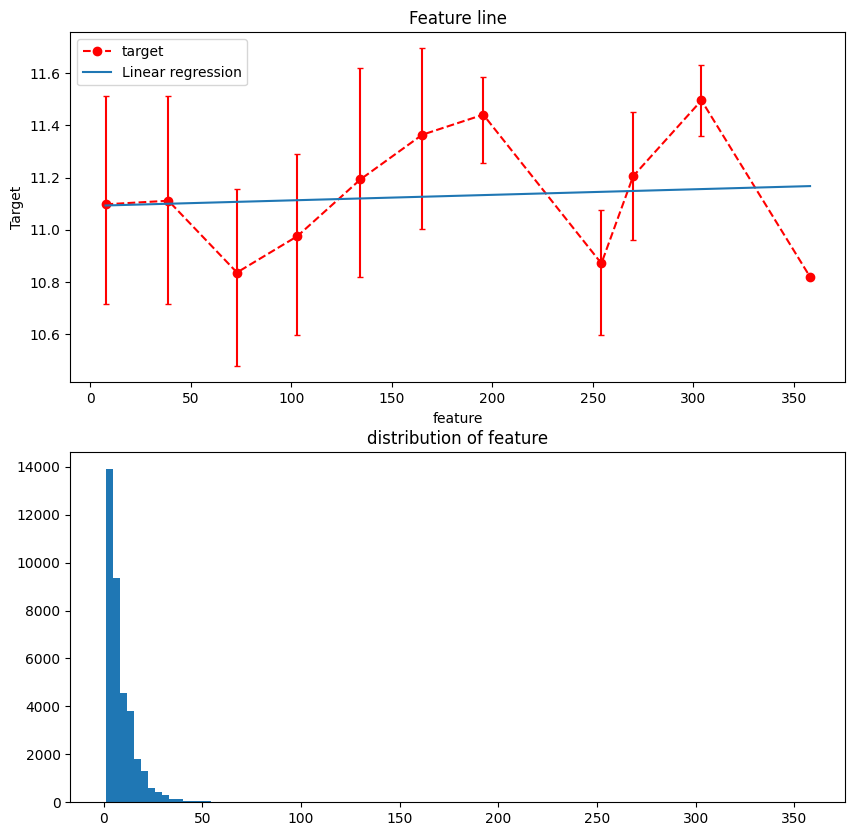

In [45]:
column = 'credit_num'
get_stats(X_train[column])
print("-"*40)
rem, r2 = feature_line(X_train[column], y_train, 12)

In [46]:
r2

0.010226330308706233

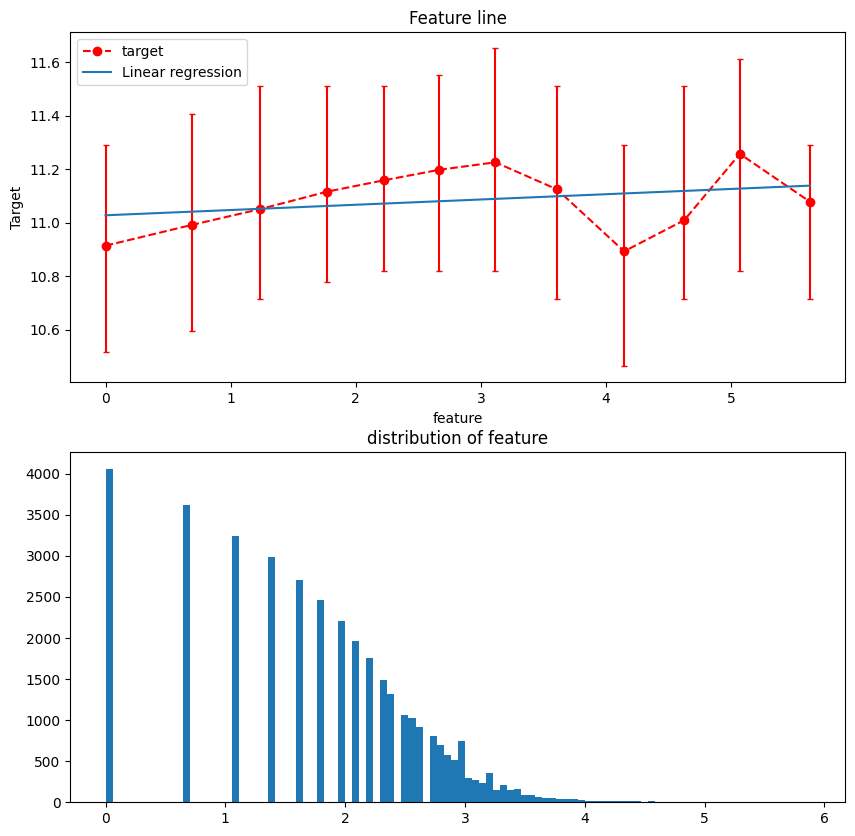

In [47]:
X_train['credit_num_log'] = np.log(X_train['credit_num'])
X_test['credit_num_log'] = np.log(X_test['credit_num'])
rem, r2 = feature_line(X_train['credit_num_log'], y_train, 12)

In [48]:
r2

0.08956882273915046

<a id='task3'></a>
##### Задание 3 (1 балл)

Решить проблему гетероскедастичности для признака in_total_amt. Проверить остальные признаки.

Подсказка: обратите внимание на ограничения значений признака in_total_amt

In [49]:
def get_residuals(Y,Pred):
    '''Подсчет невязки Y - истинное значение таргета, Pred - предсказанное'''
    return Y - Pred

In [50]:
def check_homoscedacity(predictor,target,f_name):
    simple_model = LinearRegression()
    simple_model.fit(predictor.reshape(-1,1),target)
    predicts = simple_model.predict(predictor.reshape(-1,1))
    return (plt.scatter(predicts,get_residuals(target,predicts)))

In [51]:
def make_bucket(df,feature, n =  100):
    '''функция, бьющая на бакеты(по умолчанию 100 точек)'''
    return df.assign(bucket = np.ceil(df[feature].rank(pct = True) * n))

In [52]:
def plot_homoscedacity(predictor, target, predictor_name='feature'):
    df_tmp = pd.DataFrame({'predictor':predictor, 'target':target})
    return df_tmp.pipe(make_bucket,'predictor',200)\
                 .groupby(by = ['bucket']).mean()\
                 .pipe(lambda x:check_homoscedacity(np.array(x.predictor),np.array(x.target),predictor_name))

In [53]:
X_train.columns

Index(['in_total_amt', 'job_salary', 'gender', 'age', 'car_own_flg',
       'avg_limit', 'max_limit', 'credit_num', 'acc_num', 'out_total_amt',
       'in_total_amt_log', 'age_linear', 'avg_limit_zero', 'avg_limit_log',
       'max_limit_log', 'max_limit_zero', 'acc_num_log', 'out_total_amt_log',
       'credit_num_log'],
      dtype='object')

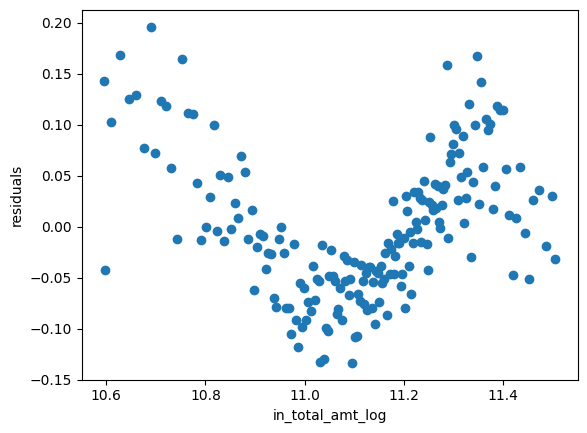

In [54]:
plot_homoscedacity(X_train.in_total_amt_log, y_train,'in_total_amt_log')
plt.xlabel('in_total_amt_log')
plt.ylabel('residuals')
plt.show()

проблема решена логарифмированием

Проверка других признаков

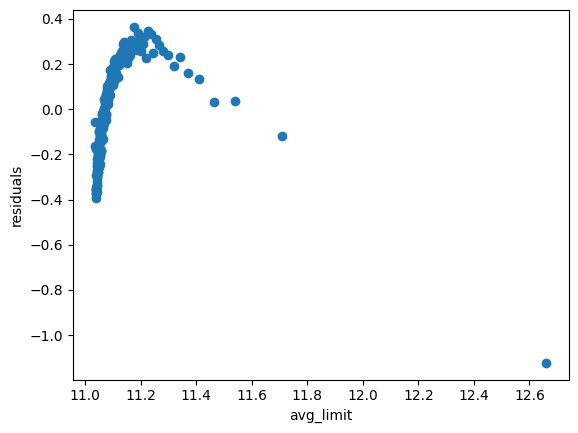

In [55]:
plot_homoscedacity(X_train.avg_limit, y_train,'avg_limit')
plt.xlabel('avg_limit')
plt.ylabel('residuals')
plt.show()

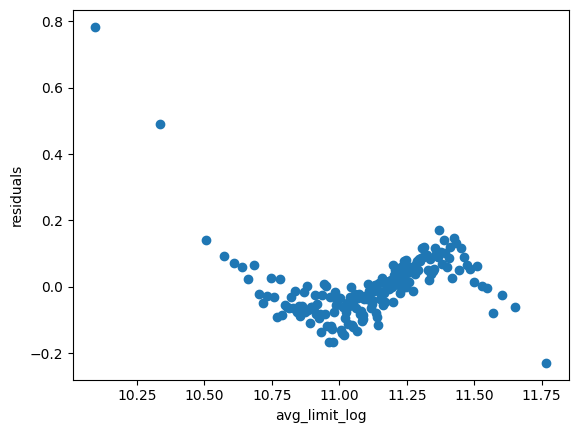

In [56]:
plot_homoscedacity(X_train.avg_limit_log, y_train,'avg_limit_log')
plt.xlabel('avg_limit_log')
plt.ylabel('residuals')
plt.show()

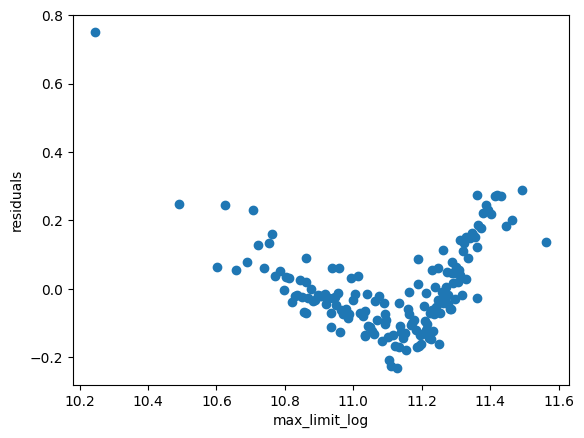

In [57]:
plot_homoscedacity(X_train.max_limit_log, y_train,'max_limit_log')
plt.xlabel('max_limit_log')
plt.ylabel('residuals')
plt.show()

<a id='task4'></a>
##### Задание 4 (1 балл)

Вычислить VIF для всех признаков. Исключить признаки, линейно зависящие от остальных.

Variance Inflation Factor (VIF) позволяет обнаружить корреляцию признака со всеми остальными в совокупности.

Для вычисления VIF строится k моделей линейной регрессии (здесь k - это количество признаков).

 - i-ый признак выбирается как целевая переменная, оставшиеся признаки - как предикторы. Строится модель линейной регрессии.
 - для предсказанных значений вычисляем VIF:
$$VIF_{i} = \frac{1}{1 - R^{2}_{i}}$$

In [58]:
def calc_VIF(target, db):
  X = db.drop(target, axis=1)
  y = db[target]
  model = LinearRegression()
  model.fit(X, y)
  pred = model.predict(X)
  r2 = r2_score(y, pred)
  vif = 1/(1-r2)
  return vif

In [59]:
X_train.columns

Index(['in_total_amt', 'job_salary', 'gender', 'age', 'car_own_flg',
       'avg_limit', 'max_limit', 'credit_num', 'acc_num', 'out_total_amt',
       'in_total_amt_log', 'age_linear', 'avg_limit_zero', 'avg_limit_log',
       'max_limit_log', 'max_limit_zero', 'acc_num_log', 'out_total_amt_log',
       'credit_num_log'],
      dtype='object')

In [60]:
X.columns

Index(['in_total_amt', 'job_salary', 'gender', 'age', 'car_own_flg',
       'avg_limit', 'max_limit', 'credit_num', 'acc_num', 'out_total_amt'],
      dtype='object')

определим признаки которые будут использоваться для обучения модели и проверим корреляцию

In [61]:
model_features=['job_salary','gender', 'car_own_flg', 'age_linear','avg_limit_zero','max_limit_zero', 'credit_num_log','in_total_amt_log', 'out_total_amt_log', 'avg_limit_log','max_limit_log','acc_num_log' ]

In [62]:
for col in model_features:
  print(col, calc_VIF(col, X_train[model_features]))

job_salary 1.519528018425609
gender 1.0264411806553893
car_own_flg 1.0257353989465874
age_linear 1.1389682604974012
avg_limit_zero 4.849199361503846
max_limit_zero 5.889242737638249
credit_num_log 1.8257811977037235
in_total_amt_log 3.0092632999270634
out_total_amt_log 7.0809983922708994
avg_limit_log 8.255833399136472
max_limit_log 7.004304893730103
acc_num_log 1.0002542922772244


воспользовавшись методом обертки, пришла к выводу что лучший результат дает модель на наборе признаков model_features

<a id='task5'></a>
##### Задание 5 (2 балла)

Построить модель линейной регрессии на рассмотренных и остальных признаках. Не забудьте проверить нормальность остатков вашей модели.

Вычислить метрику $R^2$ и сравнить с baseline.

In [63]:
model = LinearRegression()
model.fit(X_train[model_features], y_train)
y_pred = model.predict(X_test[model_features])
r2 = r2_score(y_test, y_pred)

In [64]:
r2

0.3824498092566768

**Бейзлайн**

Построим модель на необработанных признаках, (таргет логарифмировали - берем exp)

In [65]:
baseline_features = ['in_total_amt', 'job_salary', 'gender', 'age', 'car_own_flg',
       'avg_limit', 'max_limit', 'credit_num', 'acc_num', 'out_total_amt']

In [66]:
model_base = LinearRegression()
model_base.fit(X_train[baseline_features], np.exp(y_train))
y_pred_base = model_base.predict(X_test[baseline_features])
r2_base = r2_score(np.exp(y_test), y_pred_base)

In [67]:
r2_base

0.13518630983528512

У модели, обученной на предобработанных признаках, метрика R2 лучше

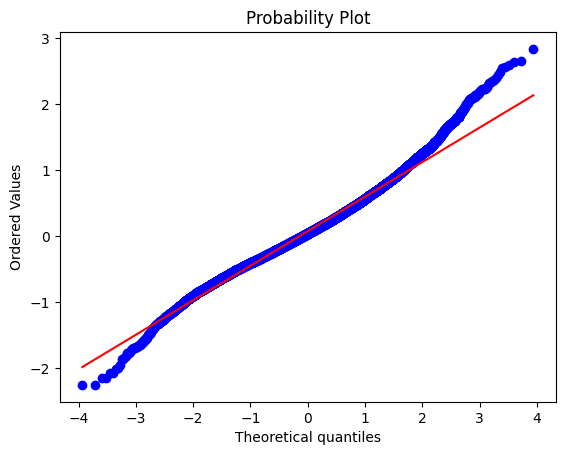

In [68]:
import scipy.stats as stats

residuals = y_test - y_pred

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


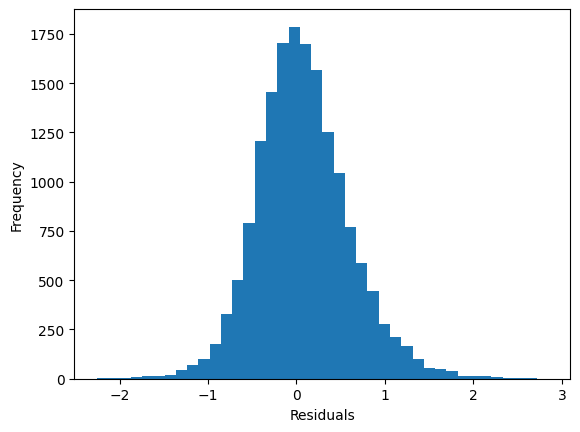

In [69]:
plt.hist(residuals, bins=40)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


остатки близки к нормальному распределению, но на QQ кривой видны отклонения

<a id='task6'></a>
##### Задание 6 (2 балла)

Рассмотрим выборку для **парной** регрессии: $y = (y_1, \ldots, y_n)\quad x = (x_1, \ldots, x_n)$

С помощью МНК можно найти коэффициенты
$$
\hat y_i = \hat \beta_0 + \hat \beta_1 x_i,\quad \hat \beta_0 = \overline y - \hat \beta_1 \overline x,\quad
\hat \beta_1 = \frac{\sum (x_i - \overline x)(y_i - \overline y)}{\sum (x_i - \overline x)^2}
$$

Доказать, что $$R^2 = \rho^2$$ где

$$
R^2 = 1 - \frac{\sum (y_i - \hat y) ^ 2}{\sum (y_i - \overline y) ^ 2}
$$

$$
\rho =
\frac{ \frac{1}{n} \sum (x_i - \overline x)(y_i - \overline y)}
{ \sqrt {\frac{1}{n} \sum (x_i - \overline x)^2 \frac{1}{n} \sum (y_i - \overline y)^2 }}
$$

– выборочный коэффициент корреляции.

Для простоты можно предполагать, что $x$ и $y$ **стандартизированы** (имеют нулевое выборочное среднее и единичную выборочную дисперсию).

Считая, что x, y стандартизированы:
$$\overline x = 0 \quad \overline y = 0\\
   \frac{1}{n}\sum x_i^2 = 1 \quad \frac{1}{n}\sum y_i^2 = 1
   \\\hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x} = 0 \\
   \rho = \frac{\frac{1}{n} \sum x_i y_i}{\sqrt{\frac{1}{n} \sum x_i^2 \cdot \frac{1}{n} \sum y_i^2}} = \frac{\frac{1}{n} \sum x_i y_i}{1} = \frac{1}{n} \sum x_i y_i
   $$

   $$
   \hat{\beta}_1 = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sum (x_i - \overline{x})^2} = \frac{\sum x_i y_i}{\sum x_i^2} = \frac{\sum x_i y_i}{n} = \frac{1}{n}{\sum x_i y_i}
\\ ⇒
   \hat{\beta}_1 =  \rho
   $$

   
   $$
   \hat{y}_i = \hat \beta_0 + \hat \beta_1 x_i =\rho x_i
   $$

---

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline{y})^2} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{n}
\\
\hat{y}_i = \rho x_i \quad n\rho = \sum x_i y_i\\⇒
\sum (y_i - \hat{y}_i)^2 = \sum (y_i - \rho x_i)^2= \sum y_i^2 - 2\rho \sum x_i y_i + \rho^2 \sum x_i^2 = n - 2\rho (n \rho) + \rho^2 n = n - 2n\rho^2 + n\rho^2 = n(1 - \rho^2)
\\
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum y_i^2} = 1 - \frac{n(1 - \rho^2)}{n} = 1 - (1 - \rho^2) = \rho^2
⇒
R^2 = \rho^2
$$
